# Paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crossroad_width = 42
crossroad_height = 10

In [3]:
# Armo el mapa del cruce

waiting_area = 'W'
street_cell = 'S'
x_cells = crossroad_width
y_cells = crossroad_height

map = np.array([[waiting_area]+[street_cell for number in range(x_cells)]+[waiting_area] for i in range(0,y_cells)])

In [4]:
pedestrians = []
vehicles = []

In [5]:
lambdapk = 0.7 # tasa de arribo de peatones (arribo / seg)
lambdavk = 0.6 # tasa de arribo de autos (arribo / seg)

def get_new_pedestrians():
    return np.random.poisson(lambdapk)

def get_new_cars():
    return np.random.poisson(lambdavk)

Hello


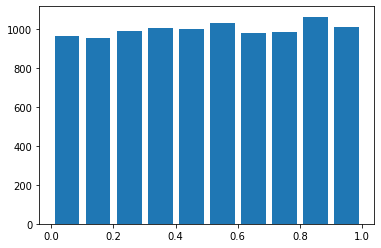

2
2
3
4
5
6


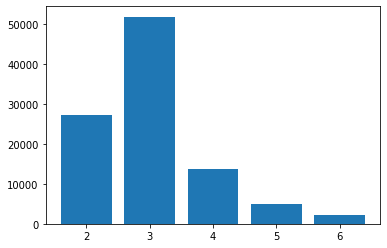

Límite superior: 9.487729036781154
D2: 5.177128632012732
El test no rechaza la hipotesis nula.


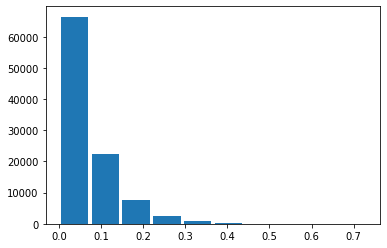

4.588534807527386e-06


./Ejercicios.ipynb:5: RuntimeWarning: divide by zero encountered in double_scalars
  "execution_count": 1,
./Ejercicios.ipynb:5: RuntimeWarning: invalid value encountered in double_scalars
  "execution_count": 1,


Rendimiento: 0.0009


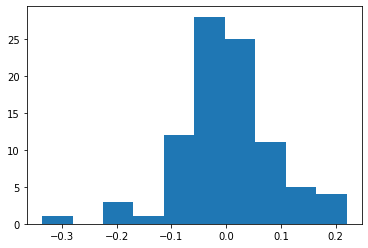

Done


In [6]:
%run ./Ejercicios.ipynb
foo()

In [7]:
def get_initial_velocity():
    return find_label(random.uniform(0, 1), proba_vector)

In [8]:
get_initial_velocity()

3

In [138]:
MAX_DISTANCE = 10000 

class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def x(self):
        return self.x
    
    def y(self):
        return self.y
    
    def is_negative(self):
        return (self.x < 0) | (self.y < 0)
    
    def __eq__(self, other):
        return (self.x == other.x) & (self.y == other.y)
    
    def __hash__(self):
        return hash(tuple([self.x, self.y]))

In [2]:
class Matrix:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
        self.matrix = []
        for i in range(0, width):
            self.matrix.append([])
            for j in range(0, height):
                self.matrix[i].append(None)

        
    def put(self, position_x, position_y, object):
        if ((position_x < 0) | (position_x >= self.width)) | \
           ((position_y < 0) | (position_y >= self.height)):
            return 
        self.matrix[position_x][position_y] = object
        
    def is_empty(self, position_x, position_y):
        if ((position_x < 0) | (position_x >= self.width)) | \
           ((position_y < 0) | (position_y >= self.height)):
            return False
        return self.matrix[position_x][position_y] == None
        
    # distancia horizontal
    def distance_to_next_object(self, position_x, position_y, direction):
        position_x += direction
        distance = 0
        while ((0 <= position_x) & (position_x < self.width)) & (distance < MAX_DISTANCE):
            if self.matrix[position_x][position_y] != None:
                return distance
            distance += 1
            position_x += direction
        return MAX_DISTANCE
            
    # distancia horizontal
    def get_next_object(self, position_x, position_y, direction):
        position_x += direction
        distance = 0
        while ((0 <= position_x) & (position_x < self.width)) & (distance < MAX_DISTANCE):
            if self.matrix[position_x][position_y] != None:
                return self.matrix[position_x][position_y]
            distance += 1
            position_x += direction
        return None
    
    # distancia vertical
    def distance_car_to_pedestrian(self, position_x, position_y):
        position_y += 1
        distance = 0
        while ((0 <= position_y) & (position_y < self.height)) & (distance < MAX_DISTANCE):
            if self.matrix[position_x][position_y] != None:
                return distance
            distance += 1
            position_y += 1
        return MAX_DISTANCE
    
    def pedestrian_on_crosswalk(self):
        for i in range(0, self.width):
            for j in range(0, self.height):
                if not self.matrix[i][j]:
                    continue
                if self.matrix[i][j].is_pedestrian():
                    return True
        return False
    
    def get(self):
        for i in range(0, self.width):
            print()
            for j in range(0, self.height):
                if not self.matrix[i][j]:
                    print('0', end=' ')
                elif self.matrix[i][j].is_pedestrian():
                    print('1', end=' ')
                else:
                    print('2', end=' ')

In [139]:
class Pedestrian:
    def __init__(self, position, velocity):
        self.position = position
        self.direction = 'right'
        self.velocity = velocity
        self.next_position = None
       
    def set_in_matrix(self, matrix):
        matrix.put(self.position.x, self.position.y, self)
        
    def avanzar(self, matrix, semaforo):
        if semaforo.is_red():
            
            if self.position.is_negative(): # no empieza a cruzar
                return
        
            # Semaforo rojo y estaba cruzando, avanza a maxima velocidad
            self.velocity = 6
            self.next_position = Position(self.position.x + 6, self.position.y)
            return self.next_position
        
        else:  # Semaforo verde
            if self.position.is_negative(): # no empieza a cruzar
                locate()
                
            self.move_forward(matrix) 
            if not self.next_position:  # Posicion ocupada
                self.lane_change(matrix)
            return self.next_position
        
        
    def continuar(self, matrix):
        matrix.put(self.position.x, self.position.y, None)
        self.position = self.next_position
        self.next_position = None
        matrix.put(self.position.x, self.position.y, self)
            
    
    # Establece su posicion y direccion inicial
    def locate(self):
        # cambiar por posiciones al azar
        self.position = Position(0,0)
        if (np.random.rand() < 0.5):
            self.direction = 'right'
        else:
            self.direction = 'left'
        
        
    def move_forward(self, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        d = matrix.distance_to_next_object(self.position.x, self.position.y, direction)
        
        if d == 0:  # la siguiene posicion esta ocupada
            return None

        self.next_position = Position(self.position.x + self.velocity * direction, self.position.y)
        self.update_velocity(direction, matrix)
        
        
    def update_velocity(self, direction, matrix):
        d = matrix.distance_to_next_object(self.next_position.x, self.position.y, direction)
        self.velocity = min(d, self.velocity)
        

    def lane_change(self, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1

        d = matrix.distance_to_next_object(self.position.x, self.position.y, direction)
        if d != 0: 
            return
        if self.can_turn_right(matrix) & self.can_turn_left(matrix):
            if (np.random.rand() < 0.5):
                self.turn_right()
            else:
                self.turn_left()
        elif self.can_turn_right(matrix):
            self.turn_right()
        elif self.can_turn_left(matrix):
            self.turn_left()
            
    
    def turn_right(self):
        self.next_position = Position(self.position.x, self.position.y + 1)
    
    def turn_left(self):
        self.next_position = Position(self.position.x, self.position.y - 1)
        
                                      
    def can_turn_right(self, matrix):
        return (matrix.is_empty(self.position.x, self.position.y + 1)) & \
               (self.velocity_higher_than_last(self.position.y + 1, matrix)) & \
               (self.velocity_less_than_next(self.position.y + 1, matrix))
                                      
    def can_turn_left(self, matrix):
        return (matrix.is_empty(self.position.x, self.position.y - 1)) & \
               (self.velocity_higher_than_last(self.position.y - 1, matrix)) & \
               (self.velocity_less_than_next(self.position.y - 1, matrix))
        
    def velocity_higher_than_last(self, position_y, matrix):
        if self.direction == 'right':
            direction = -1
        elif self.direction == 'left':
            direction = 1
        last_pedestrian = matrix.get_next_object(self.position.x, position_y, direction)
        
        if not last_pedestrian:  # nadia camina atras
            return True
        return self.velocity > last_pedestrian.velocity    
                
    def velocity_less_than_next(self, position_y, matrix):
        if self.direction == 'right':
            direction = 1
        elif self.direction == 'left':
            direction = -1
        distance = matrix.distance_to_next_object(self.position.x, position_y, direction)
        return self.velocity < distance
 
    def is_pedestrian(self):
        return True
        
    def __str__(self):
        return 'Pos {0} Vel {1}'.format(self.position, self.velocity)

    
class Car:
    def __init__(self, position, velocity):
        self.size_x = 6
        self.size_y = 5
        self.velocity = 10 # 5 m/s * 2 cell/m
        self.initial_pos = position
        self.positions = []
        for i in range(0, self.size_x):
            self.positions.append([])
            for j in range(0, self.size_y):
                self.positions[i].append(Position(position.x + i, position.y + j))
        
    def set_in_matrix(self, matrix):
        for i in range(0, self.size_x):
            for j in range(0, self.size_y):
                matrix.put(self.positions[i][j].x, self.positions[i][j].y, self)
                
    def del_in_matrix(self, matrix):
        for i in range(0, self.size_x):
            for j in range(0, self.size_y):
                matrix.put(self.positions[i][j].x, self.positions[i][j].y, None)
        
        
    def avanzar(self, matrix, semaforo):
        if semaforo.is_red(): # cambiar
            return
        
        conflict = 0
        if not matrix.pedestrian_on_crosswalk():
            distance = self.velocity
        else:
            distance = min(self.distance_to_pedestrian(matrix), self.velocity)
            if distance < self.velocity:
                conflict = 1
            
        print(distance)
        self.move(distance, matrix)
        return conflict
        
        
    def distance_to_pedestrian(self, matrix):
        distance = MAX_DISTANCE
        # Recorro todas las celdas del camino del auto para encontrar la distancia al primer peaton
        for j in range(0, self.size_x):  
            pos_x = self.initial_pos.x + j
            pos_y = self.initial_pos.y + self.size_y - 1
            d = matrix.distance_car_to_pedestrian(pos_x, pos_y)
            if d < distance:
                distance = d
        return distance
            
        
    def move(self, distance, matrix):
        self.initial_pos = Position(self.initial_pos.x, self.initial_pos.y + distance)
        self.del_in_matrix(matrix)
        for i in range(0, self.size_x):
            for j in range(0, self.size_y):
                self.positions[i][j] = Position(self.positions[i][j].x, self.positions[i][j].y + distance)
        self.set_in_matrix(matrix)
        
        
    def is_pedestrian(self):
        return False
        
        
    def __str__(self):
        return 'Pos {0} Vel {1}'.format(self.position, self.velocity)

    

In [3]:
class Semaforo:
    def __init__(self, tiempo_verde, tiempo_rojo):
        # Semaforo rojo significa que el peaton NO PODRÍA CRUZAR y el auto SI
        self.estado = 'verde'
        self.timer = 0
        self.tiempo_verde = tiempo_verde
        self.tiempo_rojo = tiempo_rojo
    
    def iterar(self, t):
            self.timer += 1
            if(self.estado == 'verde' and self.timer > self.tiempo_verde):
                self.timer = 0
                self.estado = 'rojo'
                
            elif(self.estado == 'rojo' and self.timer > self.tiempo_rojo):
                self.timer = 0
                self.estado = 'verde'
                
    def is_red(self):
        return self.estado == 'rojo'
    
    def is_green(self):
        return self.estado == 'verde'
                
    def __str__(self):
        return 'Estado {0}'.format(self.estado)

In [140]:
for i in range(get_new_pedestrians()):
    p_position = (0, random.randint(0, y_cells))
    p_velocity = get_initial_velocity()
    p = Pedestrian(p_position, p_velocity)
    print(p)
    pedestrians.append(p)
    #if ()
    #map[p.position.1, p.position.2]

In [141]:
len(pedestrians)

2

In [4]:
from arrival_utils import CarArrival, PedestrianArrival

In [23]:
class State:
    def __init__(self):
        self.cars = []
        self.pedestrians = []
        self.crossroad_width = 42
        self.crossroad_height = 10
        self.semaforo_tiempo_verde = 5
        self.semaforo_tiempo_rojo = 20
        self.nro_iteracion = 0
        self.cantidad_iteraciones = 100
        self.semaforo = Semaforo(self.semaforo_tiempo_verde, self.semaforo_tiempo_rojo)
        
        #llegada_peatornes = Poisson ???
        self.pedestrian_arrival = PedestrianArrival(0.2)
        
        #llegada_vehiculos = Poisson ???
        self.car_arrival = CarArrival(0.1)
        
        
    def iterar(self):
        
        print('cantidad peatones:', len(self.pedestrians))
        print('cantidad autos:', len(self.cars))
        
        # llegada de peatones
        self.pedestrians += self.pedestrian_arrival.next()
        
        # llegada de autos
        self.cars += self.car_arrival.next()
        
        #avanzar de estado el semaforo
        self.semaforo.iterar(1)
        
        self.matriz = self.get_positions_matrix() 
        
        
        proximas_posiciones = {}
        self.conflicto_peatones_misma_pos = 0
        # Avanzo peatones               
        for peaton in self.pedestrians:
            # Debería devolver conflictos peaton espera auto
            proxima_posicion = peaton.avanzar(self.matriz, self.semaforo)
            if not proxima_posicion:
                continue
            
            if proxima_posicion not in proximas_posiciones:
                proximas_posiciones[proxima_posicion] = peaton
            else: # dos peatones quieren ir a la misma posicion
                self.conflicto_peatones_misma_pos += 1
                if (np.random.rand() < 0.5): # con probabilidad 0.5 gana el segundo peaton
                    proximas_posiciones[proxima_posicion] = peaton
         
        for peaton in proximas_posiciones.values():
            peaton.continuar(self.matriz)
            
            
        self.conflicto_auto_espera_peaton = 0
        # Avanzo autos
        for auto in self.cars:
            # Debería devolver confflictos de tipo auto espera peaton (1)
            conflicto = auto.avanzar(self.matriz, self.semaforo)
            if conflicto:
                self.conflicto_auto_espera_peaton += conflicto
                
    def conflicto_peatones(self):
        return self.conflicto_peatones_misma_pos
                 
    def conflicto_autos(self):
        return self.conflicto_auto_espera_peaton      

        
    def __str__(self):
        return 'Iteracion {0}'.format(self.nro_iteracion)
    
    def get_matrix(self):
        ''' Devuelve la matriz lista para ser dibujada'''
        self.matriz = self.get_positions_matrix()
        return self.matriz.get()
    
    def get_positions_matrix(self):
        m = Matrix(self.crossroad_width, self.crossroad_height)
            
        for pedestrian in self.pedestrians:
            pedestrian.set_in_matrix(m)
            
        for car in self.cars:
            car.set_in_matrix(m)
            
        return m
                
            

In [65]:
class draw_matrix:
    def __init__(self):
        self.street_cell = 's'
        self.pedestrian_cell = 'p'
        self.car_cell = 'c'
    
    def valid_pos(self, x, y, width, height):
        if(x > 0 and x < width and y > 0 and y < height):
            return True
        return False
    
    def draw_state(self, state):
        matrix = []
        for i in range(0, state.crossroad_width):
            matrix.append([])
            for j in range(0, state.crossroad_height):
                matrix[i].append(self.street_cell)
        for pedestrian in state.pedestrians:
            if(valid_pos(pedestrian.position.x, pedestrian.position.y, state.crossroad_width, state.crossroad_height)):
                matrix[pedestrian.positon.x][pedestrian.position.y] = self.pedestrian_cell
        for car in state.cars:
            for i in range (0, car.size_x):
                for j in range (0, car.size_y):
                    if(valid_pos(car.position.x+i, car.position.y+j, state.crossroad_width, state.crossroad_height)):
                        matrix[car.position.x+i][car.position.y+j] = self.car_cell
        return matrix
            

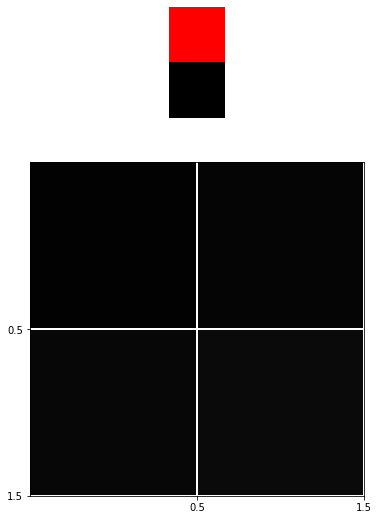

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from matplotlib.pyplot import figure

#from model import State

global s
s = [[1,2],[3,4]]

# Colores de las celdas (escala de grises)
street_cell = 50
waiting_area = 99
pedestrian_cell = 90
car_cell = 20
traffic_light_green = 4
traffic_light_red = 2
traffic_light_off = 0

# Cantidad de celdas maxima
x_cells = 2
y_cells = 2

# Genero el semaforo
traffic_lights = np.array([[traffic_light_red],[0]])

fig, ax = plt.subplots(2, 1, figsize=(16,9), gridspec_kw={'height_ratios': [1, 3]})

matrix = ax[1].imshow(s, cmap='gray', norm=plt.Normalize(0,100))

# Minor ticks
ax[1].set_xticks(np.arange(0.5, x_cells, step=1))
ax[1].set_yticks(np.arange(0.5, y_cells, step=1))

# Gridlines based on minor ticks
ax[1].grid(color='w', linestyle='-', linewidth=2)

cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["black","red","green"])

traffic_lights_matrix = ax[0].imshow(traffic_lights, cmap=cmap, norm=plt.Normalize(0,4))
ax[0].axis('off')

plt.show()



In [8]:
MAX_DISTANCE = 10000

In [24]:
state = State()


In [25]:
for i in range(0,100):
    state.iterar()
    state.get_matrix()
    
state.conflicto_peatones()
state.conflicto_autos()

cantidad peatones: 0
cantidad autos: 0

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 cantidad peatones: 0
cantidad autos: 0

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 

0

In [15]:
state.conflicto_autos()

0

In [16]:
state.conflicto_peatones()

0

In [18]:
state.get_matrix()


0 0 0 0 0 0 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 2 2 2 2 2 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 